### TL


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# import overdose data
overdose = gpd.read_file('/home/h6x/git_projects/universal-experiment-lab/experiment_1/data/shape/mortality.gdb')

In [3]:
# drop all the columns that stats with EP
# overdose = overdose.drop(overdose.filter(regex='EP').columns, axis=1)

In [ ]:
overdose.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,STCNTY,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,geometry
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001,...,19.3,7.5,0.8,25.0,3.8,18.4,1.4,5.6,1.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003,...,14.0,5.7,0.5,17.0,18.3,11.7,1.3,3.4,1.4,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005,...,22.2,12.8,1.6,53.9,1.3,29.2,3.4,9.2,11.2,"POLYGON ((-85.74803 31.61918, -85.74543 31.618..."
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007,...,16.7,6.0,0.3,25.4,2.4,28.5,0.8,6.0,9.3,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009,...,14.2,7.0,1.7,12.9,0.9,25.2,1.6,4.2,0.9,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."


In [6]:
overdose.shape

(3221, 26)

In [7]:
# load Tl info data making STN as string
tl_info = pd.read_csv('/home/h6x/git_projects/universal-experiment-lab/experiment_1/outputs/census_complex_info.csv', dtype={'STCNTY': str})

In [8]:
tl_info.head(3)

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,census_count,Total_life_span_H0,Total_mid_life_span_H0
0,GA,13001,EP_POV150,7,7,0,1,0,0.0,6.0,7.0,2.349,1.1745
1,GA,13001,EP_UNEMP,7,7,0,1,0,0.0,6.0,7.0,0.295,0.1475
2,GA,13001,EP_NOHSDP,7,7,0,1,0,0.0,6.0,7.0,1.534,0.7670


In [9]:
# merge overdose and tl_info

merged = tl_info.merge(overdose, left_on='STCNTY', right_on='STCNTY', how='left')

In [10]:
merged

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,geometry
0,GA,13001,EP_POV150,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
1,GA,13001,EP_UNEMP,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
2,GA,13001,EP_NOHSDP,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
3,GA,13001,EP_UNINSUR,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
4,GA,13001,EP_AGE65,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47125,DE,10005,EP_MUNIT,73,46,5,1,0,5.0,45.0,...,14.1,7.3,2.3,25.0,4.9,16.3,2.1,3.8,1.3,"POLYGON ((-75.72260 38.82986, -75.68959 38.831..."
47126,DE,10005,EP_MOBILE,73,73,7,1,0,7.0,72.0,...,14.1,7.3,2.3,25.0,4.9,16.3,2.1,3.8,1.3,"POLYGON ((-75.72260 38.82986, -75.68959 38.831..."
47127,DE,10005,EP_CROWD,73,49,2,1,0,2.0,48.0,...,14.1,7.3,2.3,25.0,4.9,16.3,2.1,3.8,1.3,"POLYGON ((-75.72260 38.82986, -75.68959 38.831..."
47128,DE,10005,EP_NOVEH,73,69,7,1,0,7.0,68.0,...,14.1,7.3,2.3,25.0,4.9,16.3,2.1,3.8,1.3,"POLYGON ((-75.72260 38.82986, -75.68959 38.831..."


In [12]:
# print columns
merged.columns

Index(['State', 'STCNTY', 'Variable', 'Census_count', 'H0_count', 'H1_count',
       'H0_inf_count', 'H1_inf_count', 'H1_withou_inf_count',
       'H0_withou_inf_count', 'census_count', 'Total_life_span_H0',
       'Total_mid_life_span_H0', 'ST_ABB', 'PRIS_20', 'MOR_14', 'MOR_15',
       'MOR_16', 'MOR_17', 'MOR_18', 'MOR_19', 'MOR_20', 'EP_POV', 'EP_UNEMP',
       'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL',
       'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE',
       'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'geometry'],
      dtype='object')

In [74]:
temp = merged[merged['Variable'] == 'EP_DISABL']

In [48]:
temp.head()

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,geometry
6,GA,13001,EP_DISABL,7,7,0,1,0,0.0,6.0,...,19.1,11.7,2.6,30.6,0.4,37.2,3.0,8.8,2.9,"POLYGON ((-82.55069 31.74911, -82.54744 31.749..."
21,GA,13003,EP_DISABL,3,3,0,1,0,0.0,2.0,...,15.1,11.3,9.0,43.2,1.6,45.2,3.1,7.9,0.4,"POLYGON ((-83.14100 31.40673, -83.13898 31.408..."
36,GA,13005,EP_DISABL,3,3,0,1,0,0.0,2.0,...,19.4,12.4,2.8,26.5,0.9,35.5,3.0,5.1,6.3,"POLYGON ((-82.62818 31.56593, -82.62734 31.672..."
51,GA,13007,EP_DISABL,2,2,0,1,0,0.0,1.0,...,22.1,5.7,0.6,46.5,0.2,38.5,3.5,8.4,0.1,"POLYGON ((-84.64166 31.31250, -84.63994 31.312..."
66,GA,13009,EP_DISABL,14,14,0,1,0,0.0,13.0,...,15.8,8.6,0.7,47.4,5.0,20.0,1.5,8.0,9.5,"POLYGON ((-83.42674 33.18273, -83.42496 33.182..."


In [61]:
temp['MOR_18'].describe()

count    1821.000000
mean       19.609597
std         7.560824
min         0.000000
25%        14.505673
50%        17.666126
75%        22.528363
max        84.035656
Name: MOR_18, dtype: float64

In [56]:
# print the rows where MOR_18 >85
temp[temp['MOR_18'] > 50]

,State,STCNTY,Variable,Census_count,H0_count,H1_count,H0_inf_count,H1_inf_count,H1_withou_inf_count,H0_withou_inf_count,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,geometry
18336,KY,21077,EP_DISABL,3,3,0,1,0,0.0,2.0,...,14.2,8.5,0.7,8.9,3.7,31.4,2.1,5.9,1.2,"POLYGON ((-85.01099 38.76703, -84.99995 38.774..."
19236,KY,21197,EP_DISABL,4,4,0,1,0,0.0,3.0,...,23.4,9.0,0.1,3.9,0.5,25.2,3.4,7.5,2.2,"POLYGON ((-84.02737 37.86945, -84.02630 37.870..."
19596,WV,54005,EP_DISABL,8,8,0,1,0,0.0,7.0,...,28.5,7.7,0.1,2.3,1.7,35.2,1.5,11.6,0.6,"POLYGON ((-81.97956 37.99151, -81.97943 37.991..."
19881,WV,54043,EP_DISABL,6,6,0,1,0,0.0,5.0,...,26.5,4.5,0.2,2.1,1.0,30.1,1.7,11.5,0.3,"POLYGON ((-82.30639 37.94364, -82.29091 37.955..."
19911,WV,54047,EP_DISABL,8,8,0,1,0,0.0,7.0,...,32.6,6.3,0.4,11.3,1.1,27.0,1.8,14.0,8.1,"POLYGON ((-81.99658 37.47671, -81.99297 37.479..."
20376,WV,54109,EP_DISABL,6,6,1,1,0,1.0,5.0,...,33.4,7.2,0.0,2.7,0.5,28.8,1.9,9.9,0.4,"POLYGON ((-81.85784 37.55431, -81.85594 37.558..."
24621,IN,18041,EP_DISABL,7,7,0,1,0,0.0,6.0,...,18.0,9.7,0.3,4.3,4.9,4.9,2.2,7.3,1.8,"POLYGON ((-85.30158 39.78758, -85.22112 39.788..."


In [49]:
temp.shape

(3142, 38)

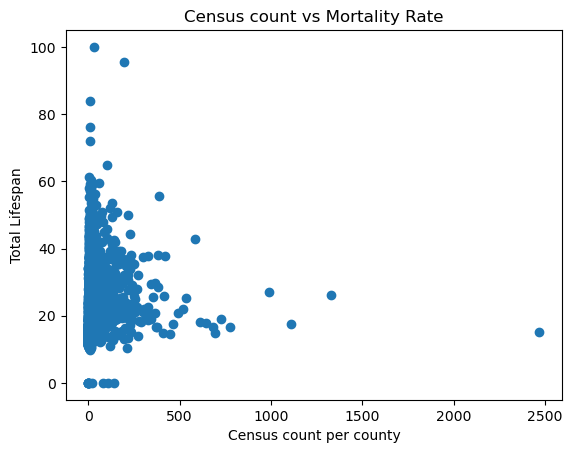

In [50]:
plt.scatter(temp['Census_count'],temp['MOR_18'])
plt.title('Census count vs Mortality Rate')
plt.xlabel('Census count per county')
plt.ylabel('Total Lifespan')
plt.show()

In [75]:
# get cencus count > 50 
a=0
b=10
temp = temp[temp['Census_count'] > a]
temp = temp[temp['Census_count'] < b]

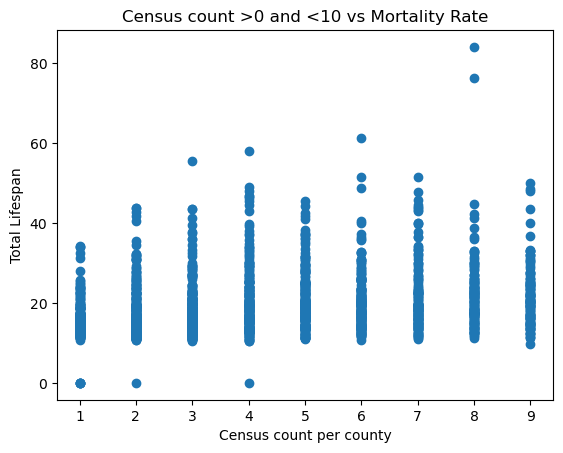

In [76]:
plt.scatter(temp['Census_count'],temp['MOR_18'])
plt.title(f'Census count >{a} and <{b} vs Mortality Rate')
plt.xlabel('Census count per county')
plt.ylabel('Total Lifespan')
plt.show()

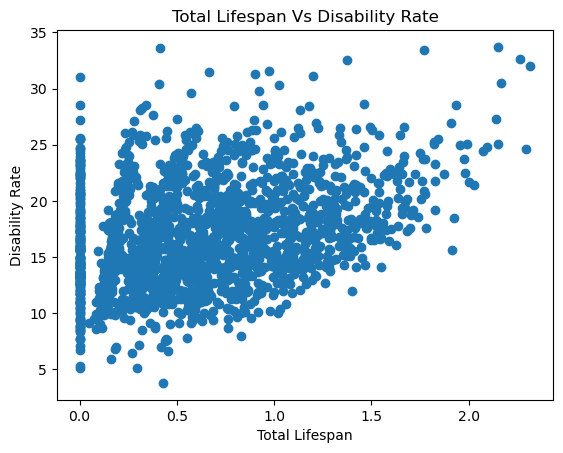

In [77]:
plt.scatter(temp['Total_life_span_H0'],temp['EP_DISABL'])
plt.title('Total Lifespan Vs Disability Rate')
plt.xlabel('Total Lifespan')
plt.ylabel('Disability Rate')
plt.show()

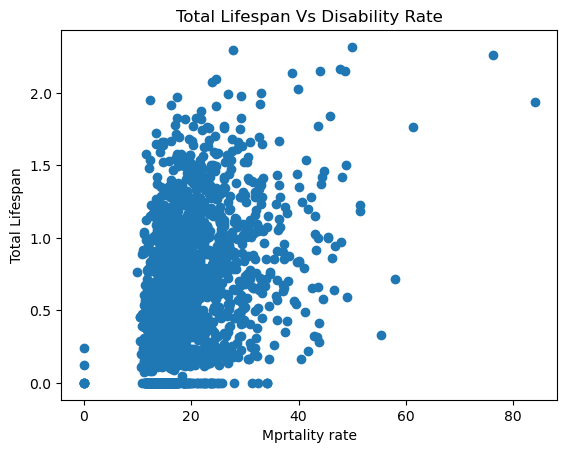

In [78]:
plt.scatter(temp['MOR_18'],temp['Total_life_span_H0'])
plt.title('Total Lifespan Vs Disability Rate')
plt.xlabel('Mprtality rate')
plt.ylabel('Total Lifespan')
plt.show()

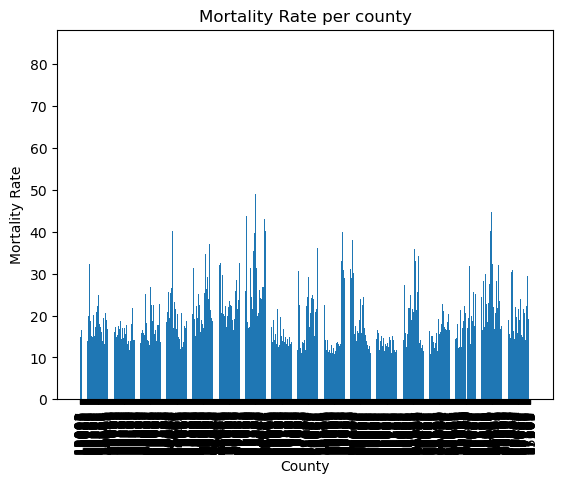

In [79]:
# plot mortality in a bar chart in temp
# temp = temp.sort_values(by='MOR_18', ascending=False)
plt.bar(temp['STCNTY'],temp['MOR_18'])
plt.title('Mortality Rate per county')
plt.xlabel('County')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=90)
plt.show()


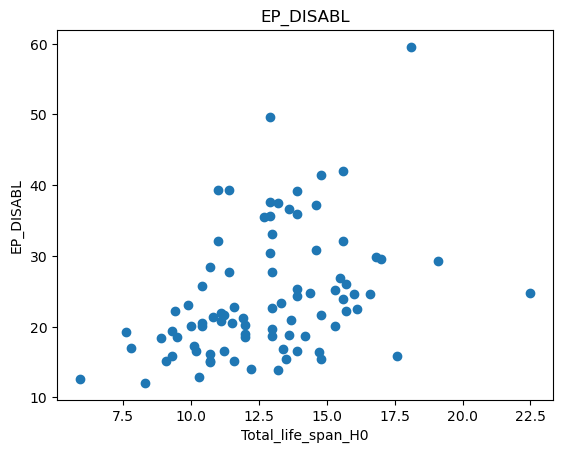

In [29]:
plt.scatter(temp['EP_DISABL'],temp['MOR_18'])
plt.title('EP_DISABL')
plt.xlabel('Total_life_span_H0')
plt.ylabel('EP_DISABL')
plt.show()

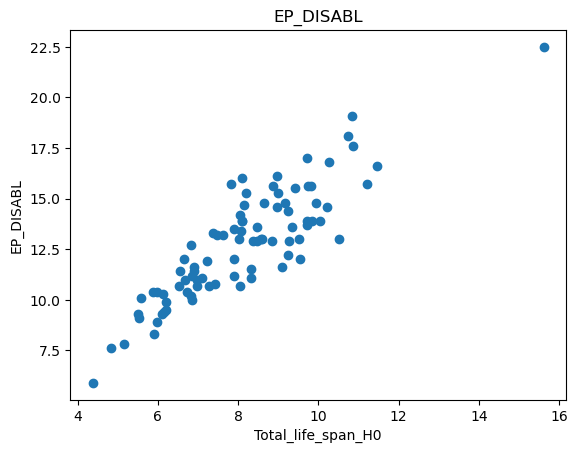

In [30]:
plt.scatter(temp['Total_life_span_H0'],temp['EP_DISABL'])
plt.title('EP_DISABL')
plt.xlabel('Total_life_span_H0')
plt.ylabel('EP_DISABL')
plt.show()

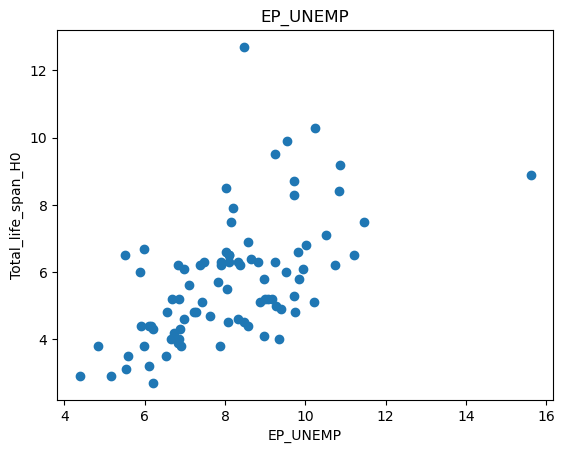

In [31]:
plt.scatter(temp['Total_life_span_H0'],temp['EP_UNEMP'])
plt.title('EP_UNEMP')
plt.xlabel('EP_UNEMP')
plt.ylabel('Total_life_span_H0')
plt.show()

In [17]:
# filter the df by STCNTY == 13001
test = merged[merged['STCNTY'] == '13001']

In [18]:
test.shape

(15, 23)

In [19]:
uniq_var = test['Variable'].unique().tolist()

EP_POV150
(3142, 23)


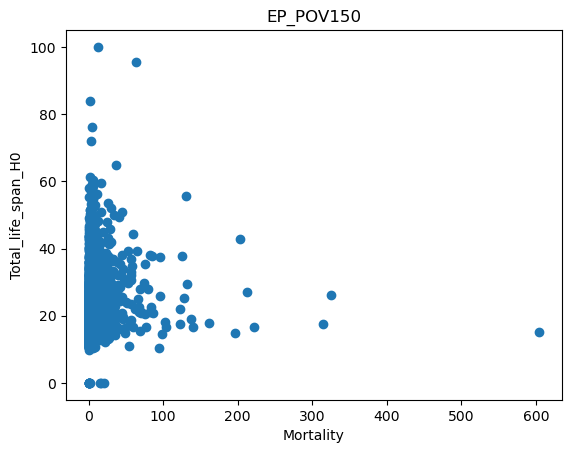

EP_UNEMP
(3142, 23)


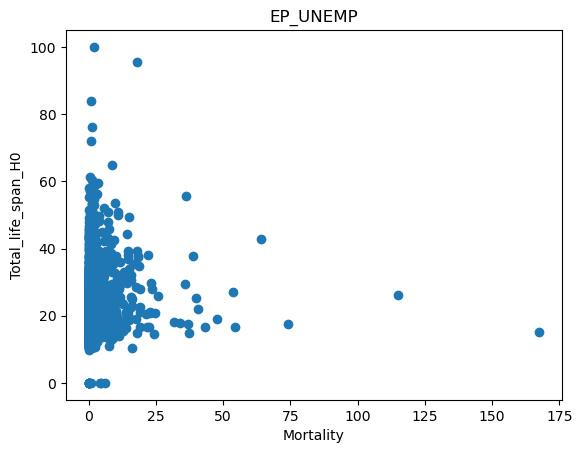

EP_NOHSDP
(3142, 23)


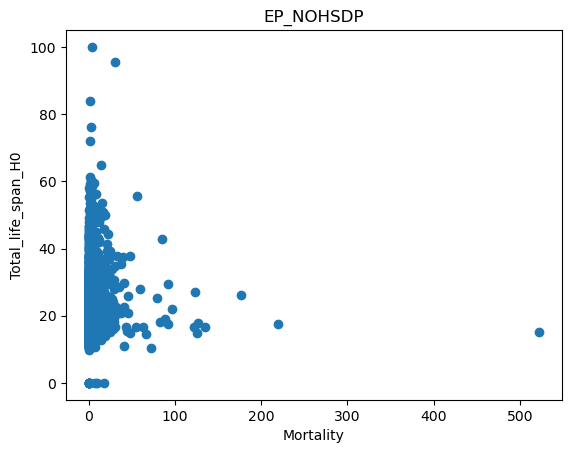

EP_UNINSUR
(3142, 23)


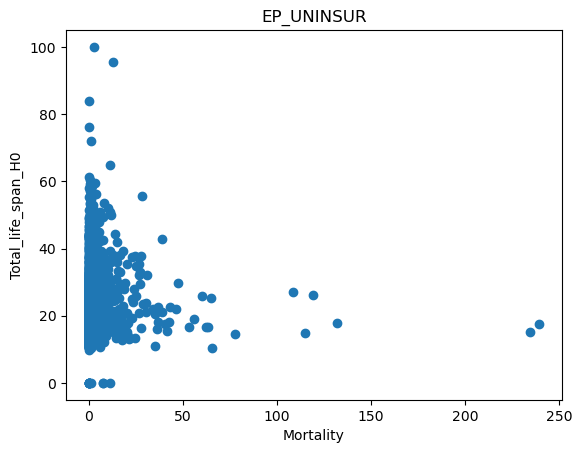

EP_AGE65
(3142, 23)


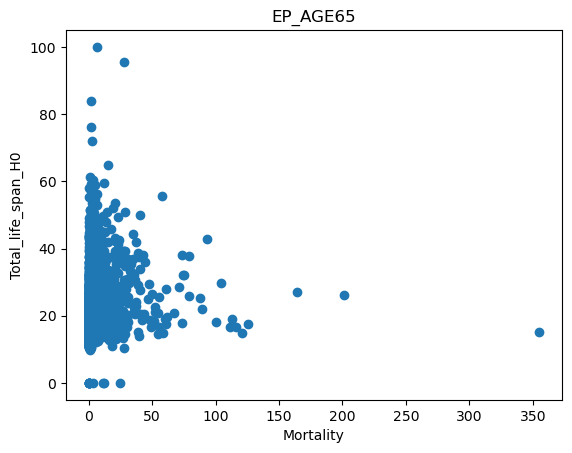

EP_AGE17
(3142, 23)


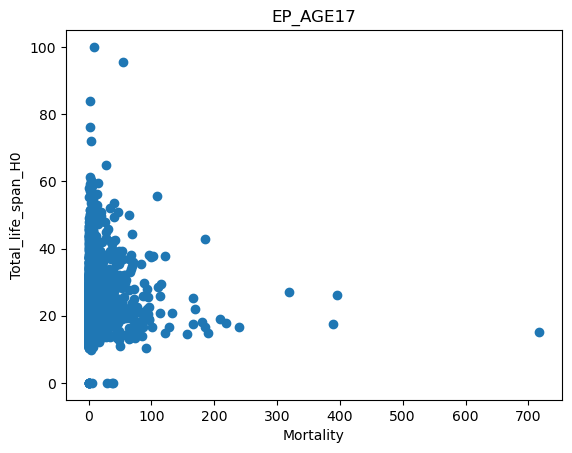

EP_DISABL
(3142, 23)


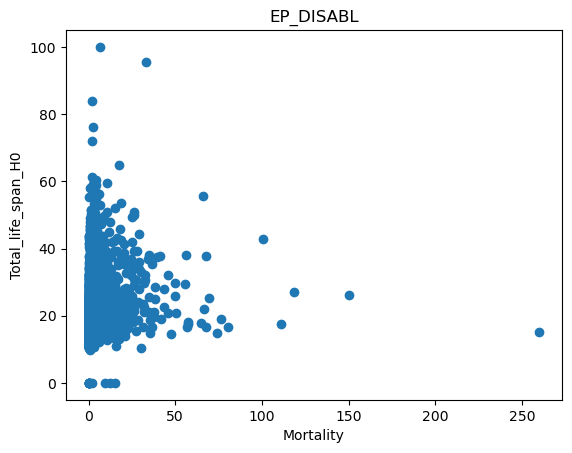

EP_SNGPNT
(3142, 23)


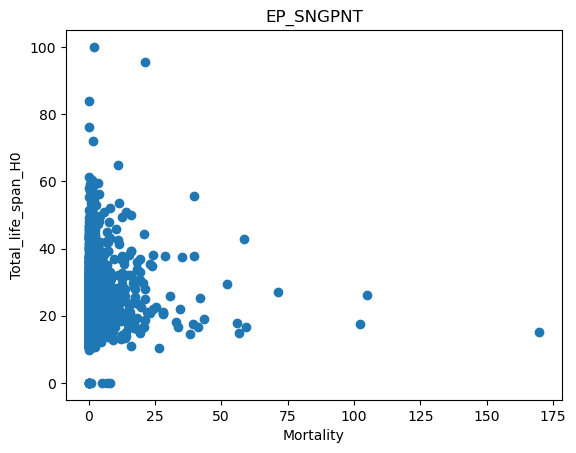

EP_LIMENG
(3142, 23)


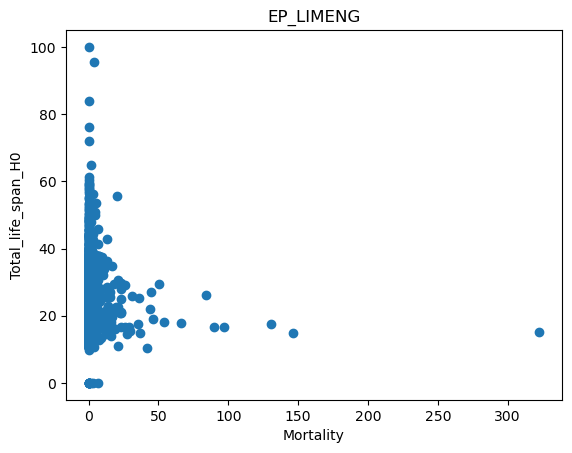

EP_MINRTY
(3142, 23)


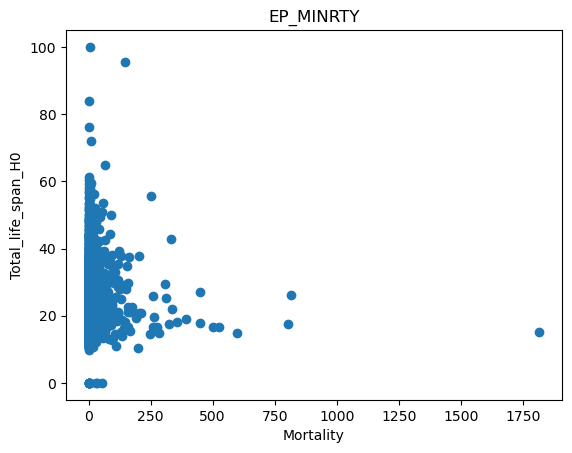

EP_MUNIT
(3142, 23)


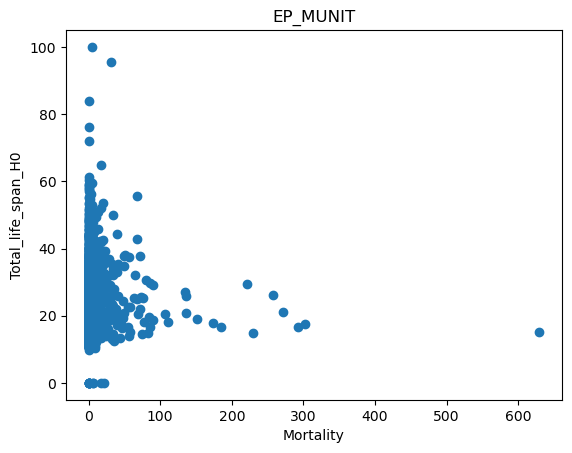

EP_MOBILE
(3142, 23)


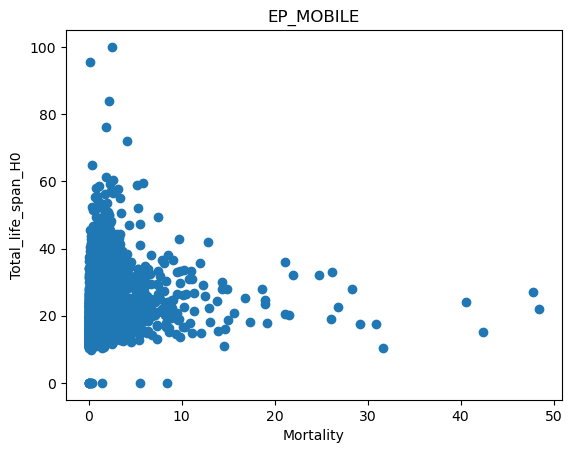

EP_CROWD
(3142, 23)


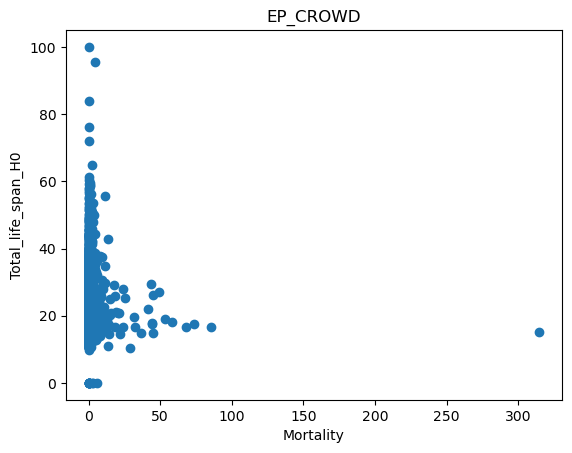

EP_NOVEH
(3142, 23)


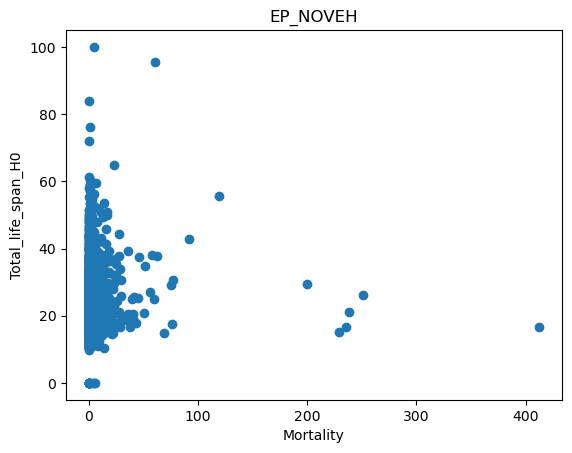

EP_GROUPQ
(3142, 23)


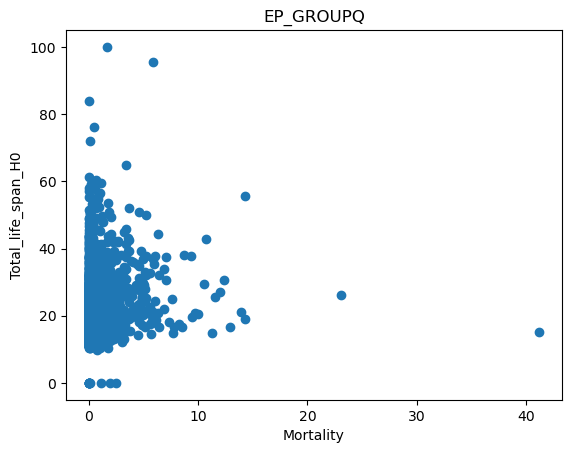

In [20]:
# LOOP THROUGH ALL THE VARIABLES

for var in uniq_var:
    print(var)
    temp = merged[merged['Variable'] == var]

    print(temp.shape)

    # plot scatter plot
    plt.scatter(temp['Total_life_span_H0'],temp['MOR_18'])
    plt.title(var)
    plt.xlabel('Mortality')
    plt.ylabel('Total_life_span_H0')
    plt.show()


    # break

EP_POV150
(3142, 23)


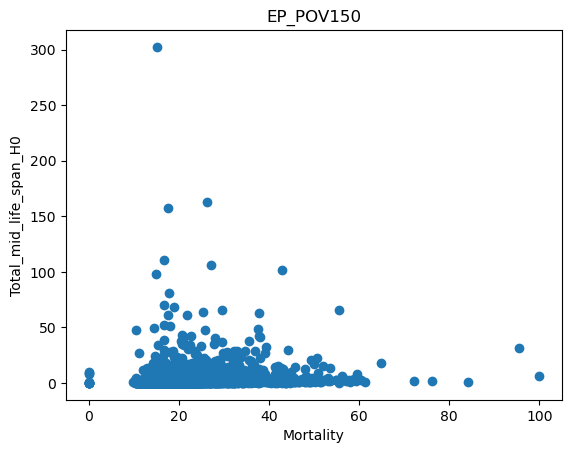

EP_UNEMP
(3142, 23)


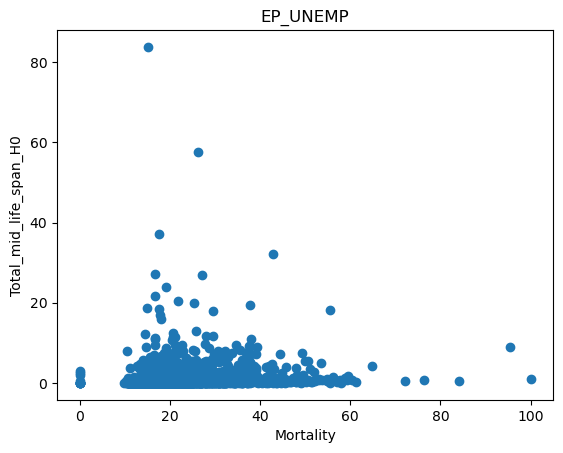

EP_NOHSDP
(3142, 23)


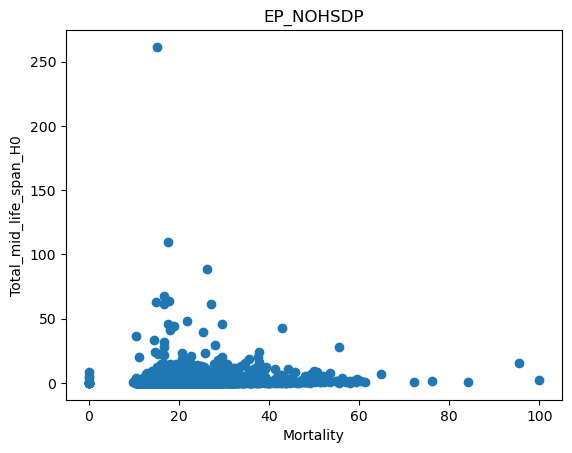

EP_UNINSUR
(3142, 23)


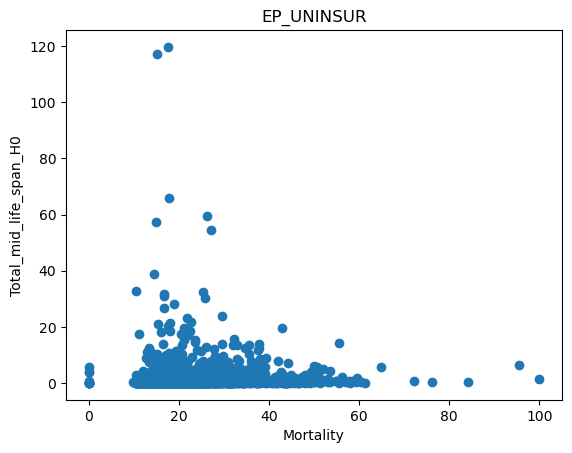

EP_AGE65
(3142, 23)


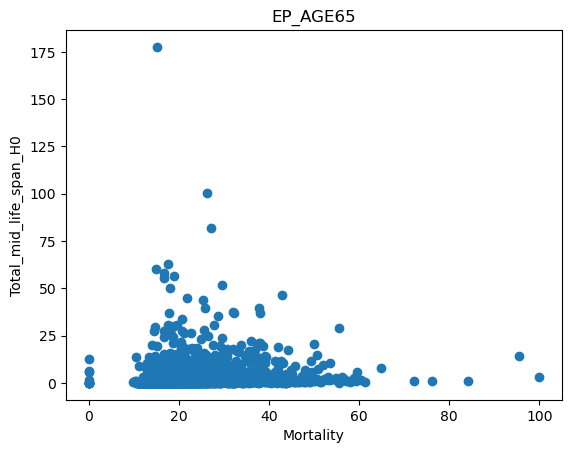

EP_AGE17
(3142, 23)


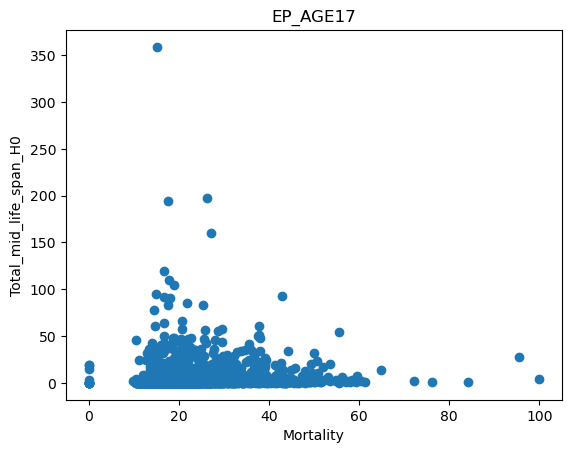

EP_DISABL
(3142, 23)


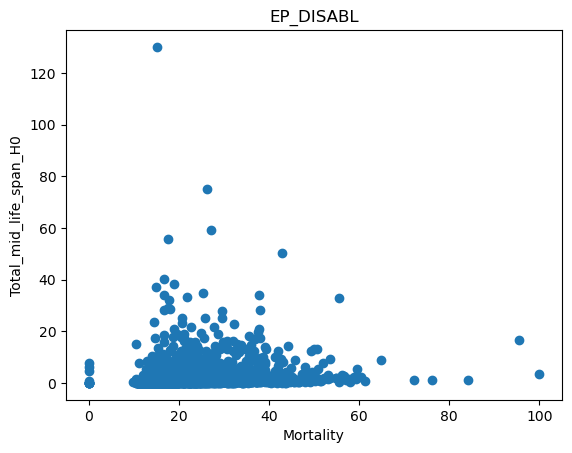

EP_SNGPNT
(3142, 23)


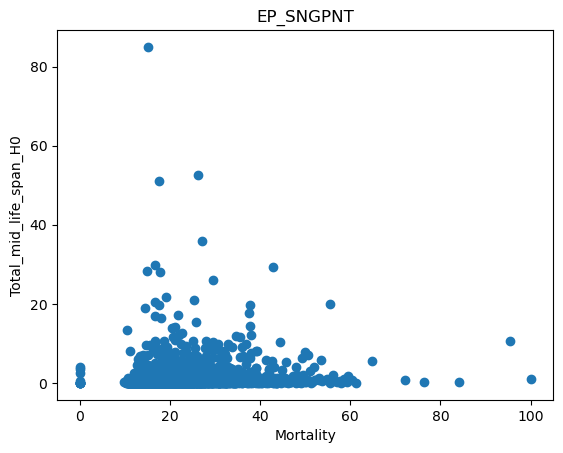

EP_LIMENG
(3142, 23)


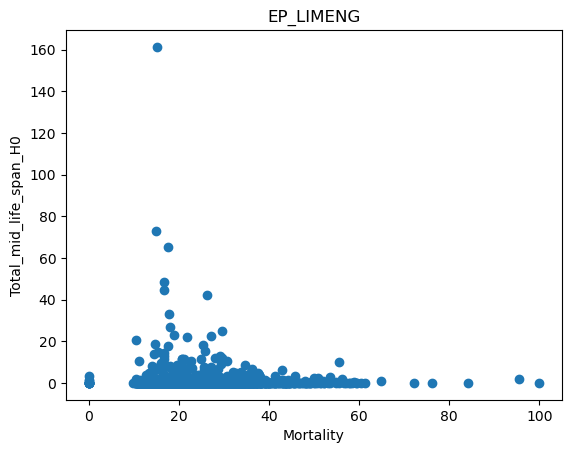

EP_MINRTY
(3142, 23)


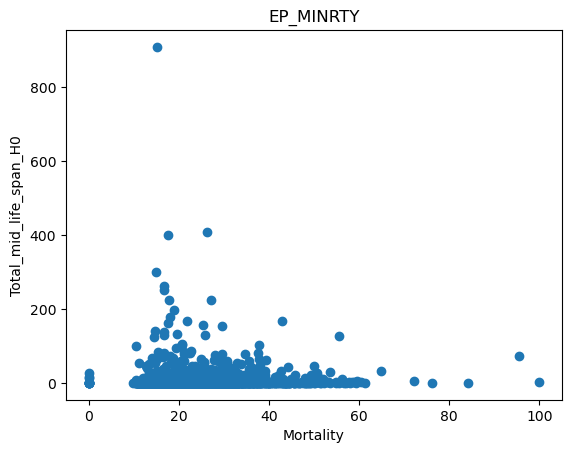

EP_MUNIT
(3142, 23)


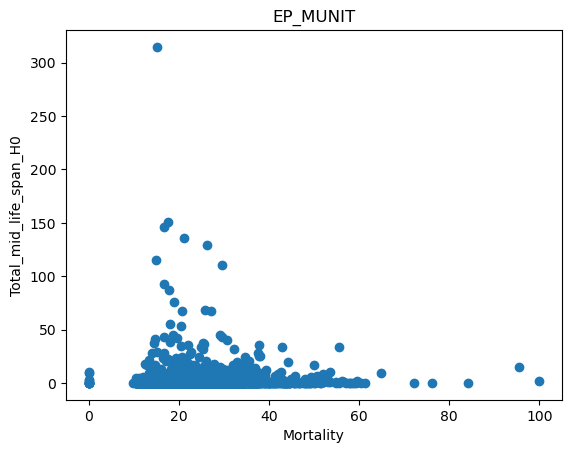

EP_MOBILE
(3142, 23)


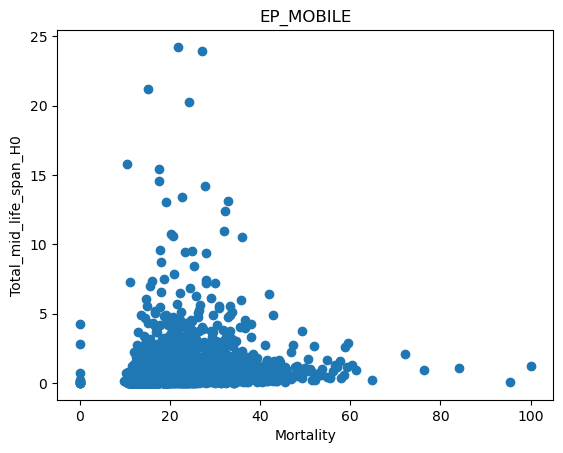

EP_CROWD
(3142, 23)


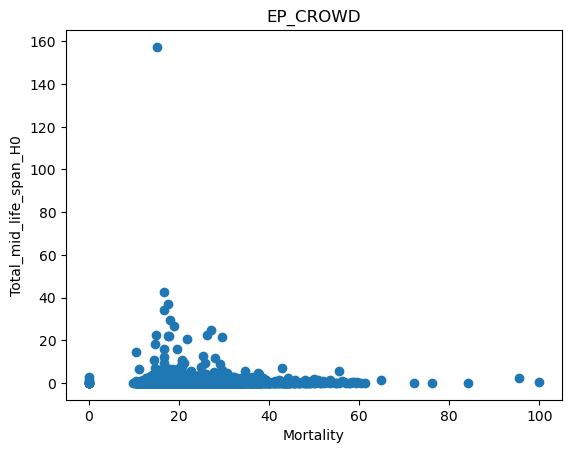

EP_NOVEH
(3142, 23)


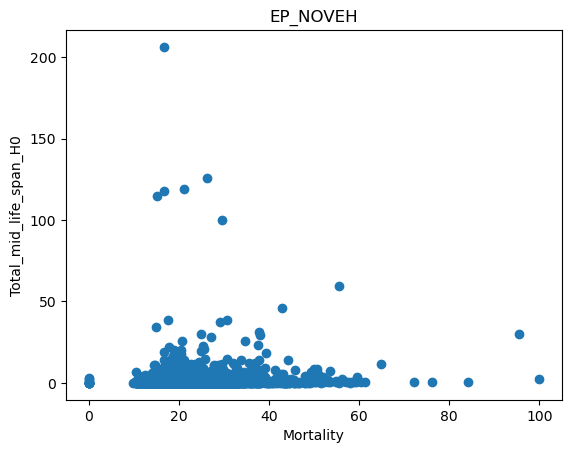

EP_GROUPQ
(3142, 23)


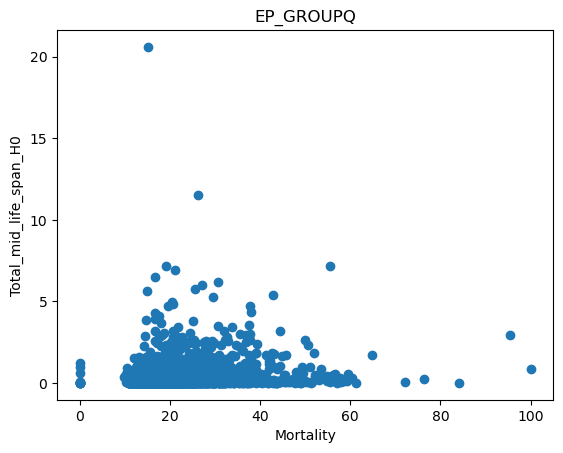

In [33]:
# LOOP THROUGH ALL THE VARIABLES

for var in uniq_var:
    print(var)
    temp = merged[merged['Variable'] == var]

    print(temp.shape)

    # plot scatter plot
    plt.scatter(temp['MOR_18'], temp['Total_mid_life_span_H0'])
    plt.title(var)
    plt.xlabel('Mortality')
    plt.ylabel('Total_mid_life_span_H0')
    plt.show()
